## Facial Expression Recognition project with logistic regression.

The project uses a Kaggle dataset from Challenges in Representation Learning: Facial Expression Recognition challenge. The dataset consists of facial images with labels of displayed emotions. In this project we build a model that tries to distinguish between "Sad" and "Neutral" images

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [4]:
label_map = ["Anger", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

In [15]:
df = pd.read_csv("facial_recognition.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


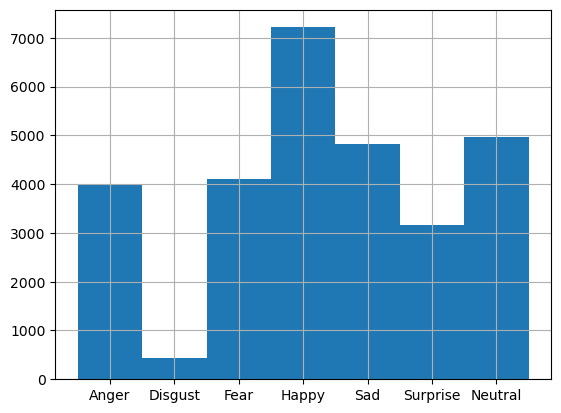

In [26]:
df["emotion"].hist(bins=np.linspace(-0.5,6.5,8))
plt.xticks(ticks=range(7), labels=label_map);

### We will take sad and neutral images (since there is about the same number of images in these categories) and will use logistic regression to try to distinguish these two categories.


In [44]:
# we define some utility functions
def getBinaryData():
    Y = []
    X = []
    first = True
    for line in open('facial_recognition.csv'):
        if first:
            first = False
        else:
            row = line.split(',')
            y = int(row[0])
            if y == 4 or y == 6:
                if y == 4:
                    Y.append(0)
                elif y == 6:
                    Y.append(1)
                X.append([int(p) for p in row[1][1:-2].split()])
    return np.array(X) / 255.0, np.array(Y)

def sigmoid(A):
    return 1 / (1 + np.exp(-A))

def sigmoid_cost(T, Y):
    return -(T*np.log(Y) + (1-T)*np.log(1-Y)).sum()

def error_rate(targets, predictions):
    return np.mean(targets != predictions)

i: 0 cost: 698.1551106303416 error 0.51
i: 20 cost: 687.7420793833455 error 0.445
i: 40 cost: 682.653604905075 error 0.433
i: 60 cost: 679.4553903286355 error 0.431
i: 80 cost: 677.1419533647994 error 0.431
i: 100 cost: 675.3477762787944 error 0.422
i: 120 cost: 673.9067267457797 error 0.417
i: 140 cost: 672.7254893060644 error 0.411
i: 160 cost: 671.7433202965055 error 0.407
i: 180 cost: 670.9171718201409 error 0.406
i: 200 cost: 670.2150875242914 error 0.406
i: 220 cost: 669.6127073567031 error 0.403
i: 240 cost: 669.0911507263048 error 0.402
i: 260 cost: 668.6356146497542 error 0.396
i: 280 cost: 668.2343918161748 error 0.393
i: 300 cost: 667.8781577957249 error 0.39
i: 320 cost: 667.5594411875668 error 0.386
i: 340 cost: 667.2722231362736 error 0.387
i: 360 cost: 667.011630877193 error 0.387
i: 380 cost: 666.7737009825553 error 0.385
i: 400 cost: 666.5551950367436 error 0.386
i: 420 cost: 666.353455198417 error 0.387
i: 440 cost: 666.1662903852907 error 0.39
i: 460 cost: 665.991886

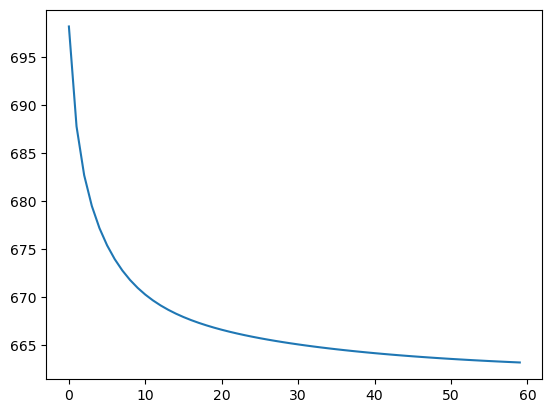

In [47]:
class LogisticModel(object):
    def __init__(self):
        pass
    
    def fit(self, X, Y, learning_rate=10e-7, reg=0, epochs=1200, show_fig=False):
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]
        
        N, D = X.shape
        self.W = np.random.randn(D)/ np.sqrt(D)
        self.b = 0
        
        costs = []
        best_validation_error = 1
        
        for i in range(epochs):
            pY = self.forward(X)
            
            #gradient descent
            self.W -= learning_rate * (X.T.dot(pY-Y) + reg * self.W)
            self.b -= learning_rate * ((pY-Y).sum() + reg * self.b)
            
            if i%20 == 0:
                pYvalid = self.forward(Xvalid)
                c = sigmoid_cost(Yvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.round(pYvalid))
                
                print("i:", i, "cost:", c, "error", e)
                
                if e < best_validation_error:
                    best_validation_error = e
                    
        print("best_validation_error", best_validation_error)
        
        if show_fig:
            plt.plot(costs)
            plt.show()
            
            
    def forward(self, X):
        return sigmoid(X.dot(self.W) + self.b)
    
    def predict(self, X):
        pY = self.forward(X)
        return np.round(pY)
    
    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)
    
    
def main():
    X, Y = getBinaryData()
    
    model = LogisticModel()
    model.fit(X, Y, show_fig=True)
    model.score(X, Y)

    
main()